This notebook was used to make my final visualization(s) for positive language, which was the percentage of words in an abstract that were positive in a research scenario, such as "novel", "speedup" and "beneficial". The results of this did end up being put in my team's final deliverables, as we felt my findings were actionable for a researcher.

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import seaborn as sns
import pandas as pd
from scipy import stats
import statistics

Actually determining what positive words to look for was very challenging. My team and I thought of many different approaches, but our final idea was asking ChatGPT to “Expand the current list of positive words that I have below and write your output in python list format (speak like an academic): [‘novel’,
‘contribution’]" (quote taken from our final report). The "new words put in during construct validity" were added after "debugging" my approach to calculating positive language, namely looking through abstracts and seeing if there were words I was missing or words from the ChatGPT list that should be removed.

In [ ]:
positive_words = [
    "novel",
    "innovative",
    "groundbreaking",
    "pioneering",
    "insightful",
    "ingenious",
    "remarkable",
    "significant",
    "meaningful",
    "valuable",
    "exemplary",
    "outstanding",
    "exceptional",
    "promising",
    "advantageous",
    "beneficial",
    "profound",
    "impactful",
    "constructive",
    "productive",
    "commendable",
    "praiseworthy",
    "laudable",
    "meritorious",
    "stellar",
    "splendid",
    "excellent",
    "superb",
    "optimal",
    "superlative",
    "first-rate",
    "top-notch",
    "positive",
    "optimistic",
    "optimizes",
    "encouraging",
    "inspiring",
    "motivating",
    "hopeful",
    "successful",
    "accomplished",
    "achievable",
    "feasible",
    "realistic",
    "accessible",
    "manageable",
    "capable",
    "competent",
    "proficient",
    "effective",
    "efficient",
    "admirable",
    "notable",
    "respectable",
    "honorable",
    "prestigious",
    "distinguished",
    "esteemed",
    "venerated",
    "respected",
    "acknowledged",
    "recognized",
    "celebrated",
    "satisfying",
    "fulfilling",
    "rewarding",
    "credible",
    "robust",
    "valid",
    "rigorous",
    "comprehensive",
    "thorough",
    "well-designed",
    "methodical",
    "meticulous",
    "precise",
    "concise",
    "persuasive",
    "convincing",
    "compelling",
    "grounded",
    "solid",
    "substantial",
    "meaningful",
    "valuable",
    "noteworthy",
    # new words put in during construct validity
    "strong",
    "outperform",
    "improve",
    "verify",
    "verified",
    "achieve",
    "speedup"
    # removed "clear"
]

In [ ]:
word_confounders = [ # words that include the fragments above but aren't as unconditionally positive
    "coefficient",
    "optimality",
]

In [ ]:
def find_word_amount(abstract):
  temp = abstract.lower()
  cnt = 0
  for word in positive_words:
    cnt += temp.count(word)
  for no in word_confounders:
    cnt -= temp.count(no)
  return cnt

For this, I did not use PySpark. Its conversion of RDDs to Pandas dataframes, which is necessary for data visualization, is extremely slow, so iterating through all the entries in our datasets via basic Python methods was the approach my team and I decided on.

In [ ]:
# get valid corpusids from pruned

valid_ids = set()
valid_ids_path = "/content/drive/MyDrive/Data Science Capstone/Semantic Scholar Datasets/pruned.jsonl"
num_papers = 0
with open(valid_ids_path, 'r') as fp:
  for num_papers, line in enumerate(fp):
    pass
num_papers += 1
print('Total number of (valid) CS papers', num_papers)
with open(valid_ids_path, 'r') as f:
  i = 0
  for line in f:
    i += 1
    paper = json.loads(line)
    valid_ids.add(int(paper["corpusid"]))
    if not i % 1555000:
      print("Processed: {} / {} \t {}%".format(i, num_papers, (i / num_papers) * 100))
  print("Processed: {} / {} \t {}%".format(i, num_papers, (i / num_papers) * 100))
print("Created set of valid IDs.")

Total number of (valid) CS papers 7796055
Processed: 1555000 / 7796055 	 19.945985501641537%
Processed: 3110000 / 7796055 	 39.891971003283075%
Processed: 4665000 / 7796055 	 59.837956504924605%
Processed: 6220000 / 7796055 	 79.78394200656615%
Processed: 7775000 / 7796055 	 99.72992750820767%
Processed: 7796055 / 7796055 	 100.0%
Created set of valid IDs.


In [ ]:
print(len("aaa bbb"))

7


In [ ]:
print(("Aaa bbb ccc").count(' ') + 1)

3


In [ ]:
ab_lengths = []

In [ ]:
# Maps each ID to number of times the positive words appear in its abstract
# divided by number of words in abstract

abstracts_path = "/content/drive/MyDrive/Data Science Capstone/Semantic Scholar Datasets/cs-abstracts.jsonl"
id_to_pos_count_dict = dict()
num_papers = 11036829
print('Total number of CS papers we have abstracts for:', num_papers)
j = 0
avg = 0
with open(abstracts_path, 'r') as f:
  i = 0
  for line in f:
    i += 1
    paper = json.loads(line)
    if int(paper["corpusid"]) in valid_ids:
      ab = str(paper["abstract"])
      num_words = ab.count(" ") + 1
      ab_lengths.append(num_words)
      id_to_pos_count_dict[paper["corpusid"]] = (find_word_amount(ab) / num_words)
      j += 1
      avg += num_words
    if not i % 1000000:
      print("Processed: {} / {} \t {}%".format(i, num_papers, (i / num_papers) * 100))
print("Total number of valid CS papers/counts we have abstracts for:", j)


Total number of CS papers we have abstracts for: 11036829
Processed: 1000000 / 11036829 	 9.060573467252233%
Processed: 2000000 / 11036829 	 18.121146934504466%
Processed: 3000000 / 11036829 	 27.1817204017567%
Processed: 4000000 / 11036829 	 36.24229386900893%
Processed: 5000000 / 11036829 	 45.302867336261166%
Processed: 6000000 / 11036829 	 54.3634408035134%
Processed: 7000000 / 11036829 	 63.42401427076564%
Processed: 8000000 / 11036829 	 72.48458773801786%
Processed: 9000000 / 11036829 	 81.5451612052701%
Processed: 10000000 / 11036829 	 90.60573467252233%
Processed: 11000000 / 11036829 	 99.66630813977456%
Total number of valid CS papers/counts we have abstracts for: 5660590


In [ ]:
print("Mean abstract word count:", avg / j)
print("Median abstract word count:", np.median(ab_lengths))

Mean abstract word count: 145.16207020822918
Median abstract word count: 131.0


In [ ]:
# randomly sampling papers to visualize data of

valid_abstract_ids_list = np.array(list(id_to_pos_count_dict.keys()))
rand_ids = set()
num_samples = 2000000
random.seed(481)
for _ in range(num_samples):
  rand_ids.add(int(random.choice(valid_abstract_ids_list)))
print("Randomly sampled {} / {} valid papers we have abstracts for, or {}%."
        .format(len(rand_ids), len(valid_abstract_ids_list), ((len(rand_ids) / len(valid_abstract_ids_list)) * 100)))

Randomly sampled 1684861 / 5660590 valid papers we have abstracts for, or 29.76475950386797%.


In [ ]:
rand_cnt_dict = dict()
for k, v in id_to_pos_count_dict.items():
  if k in rand_ids:
    rand_cnt_dict[k] = id_to_pos_count_dict[k]

The below dataset contains the 5-year citation counts of all papers in our subset of Semantic Scholar data. The cell below that is essentially joining  the positive language data with the 5-year citation data.

In [ ]:
five_yr_citation_count_path = "/content/drive/MyDrive/Data Science Capstone/Semantic Scholar Influence Metrics/citation-counts-5-yr.jsonl"
five_yr_citation_count_dict = dict()
num_cits = 15569081

In [ ]:
with open(five_yr_citation_count_path, 'r') as f:
  i = 0
  for line in f:
    i += 1
    paper = json.loads(line)
    if int(paper["corpusid"]) in rand_ids:
      five_yr_citation_count_dict[paper["corpusid"]] = paper["fiveYearCitationCount"]
    if not i % 1000000:
      print("Processed: {} / {} \t {}%".format(i, num_cits, (i / num_cits) * 100))
print("Created citation count dict. There are {} entries.".format(len(five_yr_citation_count_dict)))

Processed: 1000000 / 15569081 	 6.4229866875251025%
Processed: 2000000 / 15569081 	 12.845973375050205%
Processed: 3000000 / 15569081 	 19.268960062575307%
Processed: 4000000 / 15569081 	 25.69194675010041%
Processed: 5000000 / 15569081 	 32.11493343762551%
Processed: 6000000 / 15569081 	 38.53792012515061%
Processed: 7000000 / 15569081 	 44.96090681267571%
Processed: 8000000 / 15569081 	 51.38389350020082%
Processed: 9000000 / 15569081 	 57.806880187725916%
Processed: 10000000 / 15569081 	 64.22986687525102%
Processed: 11000000 / 15569081 	 70.65285356277612%
Processed: 12000000 / 15569081 	 77.07584025030123%
Processed: 13000000 / 15569081 	 83.49882693782632%
Processed: 14000000 / 15569081 	 89.92181362535142%
Processed: 15000000 / 15569081 	 96.34480031287653%
Created citation count dict. There are 1684861 entries.


Next, I loaded the positive language and citation data into lists, and binned the positive language data so the x-axis could represent percentage points (0.01, 0.02, etc.). I also set an x-axis limit because after a point, there are almost no data points. The visualization lowest in this notebook was put in our final report.

In [ ]:
pcnt = []
cit = []
for id in rand_ids:
  pcnt.append(id_to_pos_count_dict[id])
  cit.append(five_yr_citation_count_dict[id])

In [ ]:
bins = np.linspace(0, 1, 101)

In [ ]:
pcnt_bins = np.digitize(pcnt, bins)

In [ ]:
pcnt_binned = np.take(bins, pcnt_bins-1)

In [ ]:
pcnt_binned[:10]

array([0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
df = pd.DataFrame({'pos':pcnt, 'cit':cit})

In [ ]:
pcnt2 = [p if p < 0.17 else 0.17 for p in pcnt_binned]

In [ ]:
df2 = pd.DataFrame({'pos':pcnt2, 'cit':cit})

In [ ]:
print(df2['pos'].value_counts(sort=True))

0.00    979818
0.01    413373
0.02    183550
0.03     68625
0.04     24687
0.05      9074
0.06      3376
0.07      1246
0.08       562
0.09       222
0.10       132
0.11        75
0.12        34
0.17        30
0.13        22
0.14        13
0.16        11
0.15        11
Name: pos, dtype: int64


[Text(0.5, 0, 'Fraction of Words in Abstract That Are "Positive"'),
 Text(0, 0.5, '5-Year Citation Count Estimate'),
 Text(0.5, 1.0, "Effect of a Paper's Positive Word Count on its Influence")]

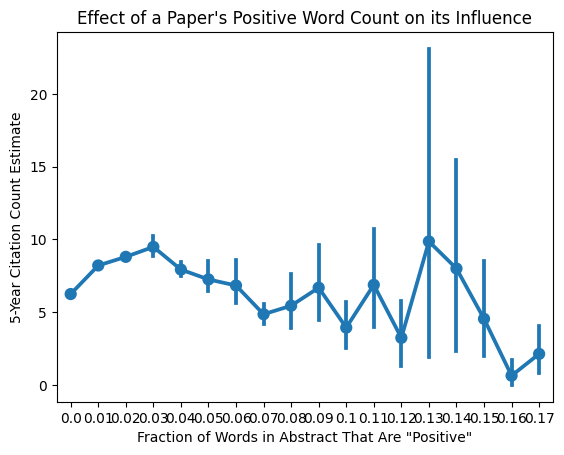

In [ ]:
sns.pointplot(data=df2, x="pos", y="cit").set(xlabel='Fraction of Words in Abstract That Are \"Positive\"', ylabel='5-Year Citation Count Estimate', title='Effect of a Paper\'s Positive Word Count on its Influence')

In [ ]:
pcnt3 = [p if p < 0.08 else 0.08 for p in pcnt_binned] #points beyond x=0.08 have high error/variance

In [ ]:
df3 = pd.DataFrame({'pos':pcnt3, 'cit':cit})

In [ ]:
df3["pos_str"] = df3["pos"].map({0.0: "0%", 0.01: "1%", 0.02: "2%", 0.03: "3%", 0.04: "4%", 0.05: '5%',
                                 0.06: "6%", 0.07: "7%", 0.08: "8+%"
                                })

In [ ]:
df3 = df3.sort_values("pos_str")

In [ ]:
import matplotlib as mpl

sns.set_theme()
sns.set_style("white")

mpl.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 17,
    'axes.labelsize': 16,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'font.family': 'sans-serif',
    'font.weight': 600,
    'axes.labelweight': 600,
    'axes.titleweight': 600,
    'figure.autolayout': True
    })

[Text(0.5, 0, 'Percent Positive Words'), Text(0, 0.5, 'Avg 5-year Citations')]

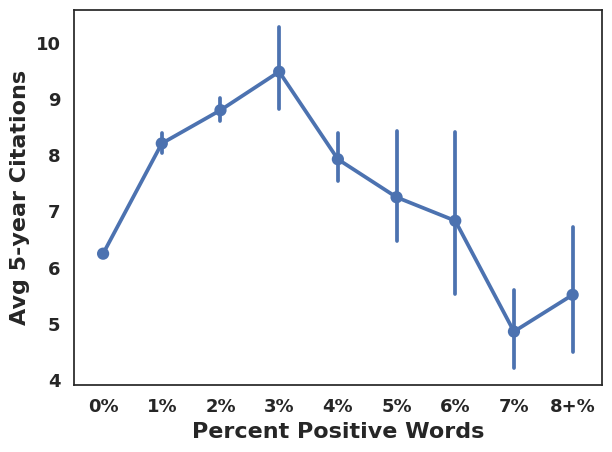

In [ ]:
sns.pointplot(data=df3, x="pos_str", y="cit", estimator="mean").set(xlabel='Percent Positive Words', ylabel='Avg 5-year Citations')
#plt.savefig('positivity_cnt_9_cutoff_remade.pdf', dpi=300)

In [ ]:
print(df3['pos'].value_counts(sort=True))

0.00    979818
0.01    413373
0.02    183550
0.03     68625
0.04     24687
0.05      9074
0.06      3376
0.07      1246
0.08      1112
Name: pos, dtype: int64


In [ ]:
temp = df3[(df3["pos"] == 0.03)]["cit"]

In [ ]:
temp2 = np.array(temp)
temp2[:5]

array([ 1, 11,  4,  6,  0])

In [ ]:
print(np.mean(np.array(df3[(df3["pos"] == 0.03)]["cit"])))

9.489544626593807


In [ ]:
print(np.mean(np.array(df3[(df3["pos"] == 0.0)]["cit"])))

6.247323482524306


In [ ]:
print(np.mean(np.array(df3[(df3["pos"] == 0.08)]["cit"])))

5.514388489208633


In [ ]:
# with open("pruned_ab_positive_counts.json", "w") as outfile:
#     json.dump(id_to_pos_count_dict, outfile)